In [5]:
using DelimitedFiles
using LinearAlgebra
using Plots
using Base.Threads, MKL

using Interpolations
using  ForwardDiff
using QuadGK

In [6]:
#a=real([[1.0+1im, 2+2im, 1+2im, 1+3im], [1,2] ])


In [7]:
#### Here using the density and the local currents the Electric field is calculated using the Jeff eqs. 

### Definitions and parameters

In [10]:
a_0= (1.054571817^2/(2*9.1093837*1.60217663) )^(1/2)
a_0 = a_0*10 # distance in Amstrongs calculated gamma = hbar^2/2ma_0^2 and assuming 
             # and assuming gamma = 1eV (Distance between lattice sites)
a_0 = 1# Amstrong 10^-10 m in Amstrong*1e-10 ### This is the distance between the lattice points
L_s =10*a_0
c   = 2.99792458*1e3# Am/fs #2.99792458*1e8 ### m/s light velocity
#ke = 8.9875517923*1e9 # Jm/C^2
#e = 1.602e-19 # electron charge in C
ke = 14.399645478 # units of eV Am /e^2
hbar = 0.658211928e0 ### units of eV
h = hbar*2*pi #eV fs
t_r = a_0/c ## distance to travel one lattice point
#Nint = 300 ;
##const1 = 1
##const2 = 1
##const3 = 1
n_lattice = 10

10

#### Data

In [6]:
# #name1 = "sneq_NiPt_soc_50_jl"
# name1= ""#"disc_above1f_so00_n20"#"NiPt_soc_ndis" 
# sden = readdlm("/home/jalil/Projects2023/TDNEGF/git_temp/TDNEGF/data_kohn_2/data/$(name1).txt",',')#,' ', ComplexF64,',')

In [20]:
sden[1]

"0.0 + 0.0im -1.2559341044409275e-9 + 0.0im 8.596264982849137e-12 + 0.0im 1.814496042978203e-5 + 0.0im -7.066136559216746e-10 + 0.0im 8.606205744052667e-12 + 0.0im 7.047732863495488e-10 + 0.0im -9.80803887810505e-13 + 0.0im 1.842397764744999e-14 + 0.0im 1.480777329306399" ⋯ 2719 bytes ⋯ "9.8080388781072e-13 + 0.0im -1.8423977647483408e-14 + 0.0im 1.4807773293059854e-12 + 0.0im 7.066136559198159e-10 + 0.0im -8.60620574404069e-12 + 0.0im 7.047732863497605e-10 + 0.0im 1.2559341044408009e-9 + 0.0im -8.596264982834037e-12 + 0.0im 1.814496042977856e-5 + 0.0im"

In [19]:
sden[1]

"0.0 + 0.0im -1.2559341044409275e-9 + 0.0im 8.596264982849137e-12 + 0.0im 1.814496042978203e-5 + 0.0im -7.066136559216746e-10 + 0.0im 8.606205744052667e-12 + 0.0im 7.047732863495488e-10 + 0.0im -9.80803887810505e-13 + 0.0im 1.842397764744999e-14 + 0.0im 1.480777329306399" ⋯ 2719 bytes ⋯ "9.8080388781072e-13 + 0.0im -1.8423977647483408e-14 + 0.0im 1.4807773293059854e-12 + 0.0im 7.066136559198159e-10 + 0.0im -8.60620574404069e-12 + 0.0im 7.047732863497605e-10 + 0.0im 1.2559341044408009e-9 + 0.0im -8.596264982834037e-12 + 0.0im 1.814496042977856e-5 + 0.0im"

In [ ]:
b = map(x->eval(parse(x)),readdlm("/home/jalil/Projects2023/TDNEGF/git_temp/TDNEGF/data/$(name1).txt"))

In [11]:
#name1 = "NiPt_soc_50"#"Ni_soc_ndis"
#name1= "disc_abov1f_so00_n20"#"NiPt_soc_ndis" 
#name1= "disc_abov2f_so00_n20"#"NiPt_soc_ndis" 
name1="res_U0_w12" #"disc_n20_rash01_test_jsd0005"#"disc_abov2f_so00_n20"#"NiPt_soc_ndis" 
############################
##name1 = "ndisc_n20_justlight_rash01" ## Only light
##name1="disc_abov1f_so01_n20" ## Only demag
##name1="disc_n20_lightdemag_rash01" ## Light and Demag
##### Same as before but wihout soc
##name1="disc_n20_lightdemag_rash00" ## Light and Demag
#name1 = "ndisc_n20_justlight_rash00" ## Only light
##n = readdlm("/home/jalil/Projects2023/TDNEGF/git_temp/TDNEGF/data/cden_$(name1)_jl.txt") ### Charge density
#bcurr = readdlm("/home/jalil/Projects2024/Demagnetization_and_light/TDNEGF/data_kohn/data/bcurr_$(name1)_jl.txt") ; ### Current
bcurr = readdlm("./data/bcurr_$(name1)_jl.txt") ; ### Current
#bscurr = readdlm("/home/jalil/Projects2023/TDNEGF/git_temp/TDNEGF/data/bcurr_$(name1)_jl.txt") ; ### Current

# Charge current pumped by magnons

In [17]:


t0 = 10000#10000
Dt = 10000#9990

Magns = readdlm("./data/cspins_$(name1)_jl.txt") 

# f = LinearInterpolation(bcurr[:,1][1:Dt], bcurr[:, 1+i][t0+1:t0+Dt])
# d_f(t)=ForwardDiff.derivative(f,t)
site=1
Magns[:,site*3+2] ### x component
M_sites = []
dM_sites = []
for i in range(1,n_lattice-1)
    Mx = LinearInterpolation(Magns[1:Dt,1], Magns[t0+1:t0+Dt,site*3+2]) ### y component
    My = LinearInterpolation(Magns[1:Dt,1], Magns[t0+1:t0+Dt,site*3+3]) ### y component
    Mz = LinearInterpolation(Magns[1:Dt,1], Magns[t0+1:t0+Dt,site*3+4]) ### z component
    dMx(t)=ForwardDiff.derivative(Mx,t)
    dMy(t)=ForwardDiff.derivative(My,t)
    dMz(t)=ForwardDiff.derivative(Mz,t)
    push!(M_sites,[Mx,My,Mz])
    push!(dM_sites,[dMx,dMy,dMz])
end

In [24]:
M_sites[1][3]
Jα(t,i) = (dM_sites[i][1](t)*M_sites[i+1][2](t)*M_sites[i][3](t) +
          dM_sites[i][2](t)*M_sites[i+1][3](t)*M_sites[i][1](t) +
          dM_sites[i][3](t)*M_sites[i+1][1](t)*M_sites[i][2](t) )

Jβ(t,i) = (dM_sites[i][1](t)*(M_sites[i+1][1](t)-M_sites[i][1](t)) +
          dM_sites[i][2](t)*(M_sites[i+1][2](t)-M_sites[i][2](t)) +
          dM_sites[i][3](t)*(M_sites[i+1][3](t)-M_sites[i][3](t)) )
# dM_sites[9][2](1)#.(1)
#M_sites[1][3](0)
dJ = [ ]

for i in range(1,n_lattice-2)
    J(t) = Jα(t,i)
    diJ(t)= ForwardDiff.derivative(J,t)
    #println(diJ(4))
    push!(dJ,diJ)
end

#Jβ(0.1,2)
#dJ[1]#[0](1)#[1](0.1)

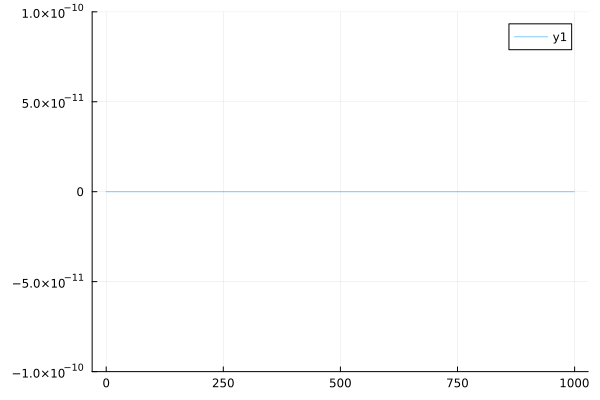

In [20]:
### Checking the plo
tss = 0.0:0.1:999
#plot(tss,fx.(tss),alpha =0.5)
J1(t)=Jα(t,8)
J2(t)=Jβ(t,8)
#plot(tss,J1.(tss),alpha =0.5)
plot(tss,J2.(tss),alpha =0.5,ylim=(-1e-10,1e-10))

### Checking the data, the interpolation function and its derivate

In [10]:
#plot(n[:,1], n[:,2], ylims = ( -30e-5-1e-5,-30e-5+1e-5), xlims = (5000,5200)  )
#plot(n[:,1], n[:,3], ylims = ( 10e-5,+15e-5), xlims = (5000,5200) )

In [11]:
### Interpolation of the function and its derivate
# itp = LinearInterpolation(n[:,1], n[:,2])
# d_itp(t)=ForwardDiff.derivative(itp,t) ;

In [12]:
### Check that the interpolation method is working!
# ts = 0:0.2:50 
# plot(ts,itp.(ts), ylims = ( -30e-5-1e-5,-30e-5+1e-5), xlims = (5000,5200))
# plot!(n[:,1], n[:,2] , linestyle = :dash) 

### Interpotation and derivatives of all the data 

In [6]:
bcurr[:,1];

In [25]:
#### Interpolation and derivative of the bond currents 
bc_currs_funcs = []
dt_bc_currs_funcs = []

t0 = 10000#10000
Dt = 10000#9990

bscx_currs_funcs = []
dt_bscx_currs_funcs = []
bscy_currs_funcs = []
dt_bscy_currs_funcs = []
bscz_currs_funcs = []
dt_bscz_currs_funcs = []
### Here we use only what we need 400 points in fs of 4000 data points to do the interpolation
for i in range(1,n_lattice-1)
    ### Linear interpolation of the bond currents for each one on the sites
    f = LinearInterpolation(bcurr[:,1][1:Dt], bcurr[:, 1+i][t0+1:t0+Dt])
    fsx = LinearInterpolation(bcurr[:,1][1:Dt], bcurr[:,n_lattice+i][t0+1:t0+Dt])
    fsy = LinearInterpolation(bcurr[:,1][1:Dt], bcurr[:,2*n_lattice-1+i][t0+1:t0+Dt])
    fsz = LinearInterpolation(bcurr[:,1][1:Dt], bcurr[:,3*n_lattice-2+i][t0+1:t0+Dt])
    ### Store the data in a list
    push!(bc_currs_funcs, f  )
    push!(bscx_currs_funcs, fsx  )
    push!(bscy_currs_funcs, fsy  )
    push!(bscz_currs_funcs, fsz  )
    ### Derivative of the linear interpolation
    d_f(t)=ForwardDiff.derivative(f,t)
    d_fx(t)=ForwardDiff.derivative(fsx,t)
    d_fy(t)=ForwardDiff.derivative(fsy,t)
    d_fz(t)=ForwardDiff.derivative(fsz,t)
    ### Store the data in a list
    push!(dt_bc_currs_funcs,d_f )
    push!(dt_bscx_currs_funcs,d_fx )
    push!(dt_bscy_currs_funcs,d_fy )
    push!(dt_bscz_currs_funcs,d_fz )
end
#### -----------------------------------------------
#### Interpolation and derivative respect time of local densities
# cden_funcs = []
# dt_cden_funcs = []
# for i in range(1,n_lattice)
#     ### Linear interpolation of the charge density 
#     f = LinearInterpolation(n[:,1][1:4000], n[:,1+i][50000+1:54000])
#     ### Store the interpolation function in a list
#     push!(cden_funcs, f )
#     ### Derivative of the linear interpolation 
#     d_f(t)=ForwardDiff.derivative(f,t)
#     ### Store the derivative function in a list 
#     push!(dt_cden_funcs,d_f )
# end
#### -----------------------------------------------

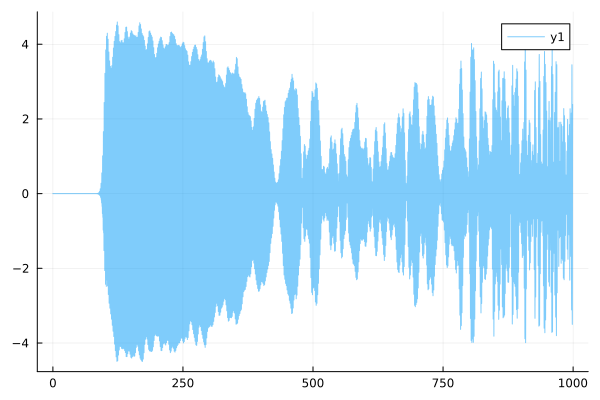

In [24]:
### Checking the plo
tss = 0.0:0.1:999
plot(tss,dt_bc_currs_funcs[2].(tss),alpha =0.5)

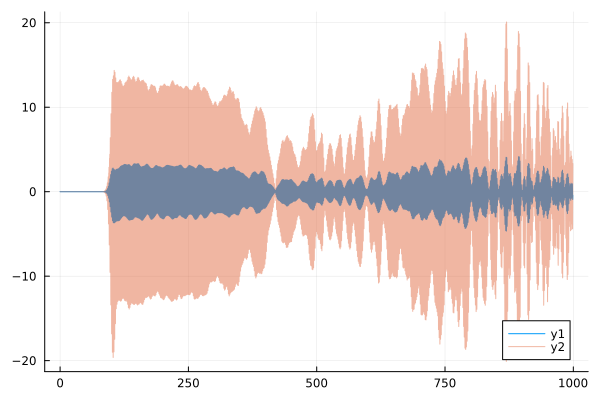

In [25]:
### Checking the plots of the bond currents 
tss = 0.0:0.1:999
plot(tss,bc_currs_funcs[1].(tss))
plot!(tss,dt_bc_currs_funcs[1].(tss),alpha=0.5)

### Integration of the Jeff Equations

In [44]:
# ### Nottice that we will assume that our coordinate system is in the site 1 of the central system
# function pos(j)
#     ex = [1 , 0 , 0]
#     return ex*a_0*j ### Position vector  with coordinates in Amstrongs 
# end
# function Jeff_Efield(r=[1,2,3], n = cden_funcs, dn = dt_cden_funcs, dI = dt_bc_currs_funcs ; t=0.1 )
#     """ This function calculates the electric field produced by the Jeff eq. 
#     """
#     E = zeros(3)
#     ##println(0)
#     #for tt in range(ti,tf) ### range of times where the Electric field is calculated
#     for j in range(1,n_lattice) ### l is the number of lattice points considered
#         ##println(j)
#         rn = pos(j) ### pos contain all the position of the lattice in a vector format
#         ### Derivate and local density 
#         tt = t - norm(r-rn)/c
#         E += const1*n[j](tt)*(r-rn)/norm(r-rn)^3
#         E += const2*dn[j](tt)*(r-rn)/norm(r-rn)^2
#     end
#     ##println(0)
#     for  i in range(1, n_lattice-1)  ## Run over the number of bounds of the system
#         ### Notice that only NN are considered
#         ##println(i)
#         j = i+1
#         r1 = pos(i)
#         r2 = pos(j)
#         #dt = 1/Nint
#         dl = (r2-r1)/Nint
#         val = zeros(3)
#         ##println(dl)
#         for n_l in range(1,Nint)
#             l = r1 + dl*n_l
#             tt = t - norm(r-l)/c
#             val = val + const3*dI[i](tt)*dl/norm(r-l) 
#             ##println(dI[i](tt) , dl)
#         end
#         E += val #const3*dI[tt,i]*val
#     end       
#     #end
#     return E
# end

In [45]:
# function E_n(n = cden_funcs;r=[1,2,3], t = 0.1)
#     E = zeros(3)
#     for j in range(1,n_lattice) ### l is the number of lattice points considered
#         ##println(j)
#         rn = pos(j) ### pos contain all the position of the lattice in a vector format
#         ### Derivate and local density 
#         tt = t - norm(r-rn)/c
#         E += n[j](tt)*(r-rn)/norm(r-rn)^3
#         #E += const2*dn[j](tt)*(r-rn)/norm(r-rn)^2
#     end
#     return E
# end

In [150]:
#### Now i have to calculate the derivative of this functions



-9.123514122728291e-5

### Proper value for the integral over the currents

In [28]:
### Nottice that we will assume that our coordinate system is in the site 1 of the central system
# function pos(j)
#     """ This function returns the position as a vector
#         in the coordinate axis dependning of the site j"""
#     ex = [1 , 0 , 0]
#     return ex*a_0*j ### Position vector  with coordinates in Amstrongs 
# end

function E_dtJ(dI = dJ; r=[1,2,3], t=0.1) #
    """ This function calculates the contribution from 
        the derivate of the current to the electric field"""
    r = r*a_0 ### we use Amstrongs
    E = zeros(3)
    E1_x = 0.
    E2_x = 0.
    E2_y = 0.
    E2_z = 0.
    #tt = 0.
    ### Note that it is assumed that the current is constant from i --> i+1 except for the relativistic effects
    ### also in the finite region the current is assumed to have the same values (y-z direction) (Taking the same direction)
    for i in range(1,n_lattice-2) ### Run over the lattice sites
        ### Integral 1 (Only points in x direction because ir prop to the current)
        #println(dI[i](0.1))
        val1x, err = quadgk(x -> dI[i](t- norm(r-[x,0,0])/c )/norm(r-[x,0,0]), a_0*i, a_0*(i+1) )
        E1_x += val1x
        ### Integral 2
        val2x , err = quadgk(x -> (r[1]-x)^2*dI[i](t- norm(r-[x,0,0])/c )/norm(r-[x,0,0])^3, a_0*i, a_0*(i+1) )
        val2y , err = quadgk(x -> (r[1]-x)*r[2]*dI[i](t- norm(r-[x,0,0])/c )/norm(r-[x,0,0])^3, a_0*i, a_0*(i+1) )
        val2z , err = quadgk(x -> (r[1]-x)*r[3]*dI[i](t- norm(r-[x,0,0])/c )/norm(r-[x,0,0])^3, a_0*i, a_0*(i+1) )
        E2_x += val2x
        E2_y += val2y
        E2_z += val2z
        E = [E2_x-E1_x, E2_y, E2_z] ;
    end
    return E*ke/(c^2*h)*a_0^2 ;  ### The division by h is because the current is un units of (gamma e /h)
end


E_dtJ (generic function with 2 methods)

In [29]:
# function E_dt2M(d2M = dt2_M_funcs; r=[1,2,3], t=0.1) :
    
#     E=((r-[x,0,0])×dt2_M_funcs[i](t- norm(r-[x,0,0])/c ))/norm(r-[x,0,0])^2

#     E*ke/(c^3*h)*a_0^2

E_dtJ( r=[1,2,3], t=0.1)

3-element Vector{Float64}:
 -4.429648302846277e-12
 -1.5877380265062772e-12
 -2.3816070397594163e-12

In [159]:
#plot(tss,cden_funcs[1](300))
#E_dtJ(;t=0.1,r=[1,2,3])

In [160]:
# EJ(t,r) = E_dtJ(;t=t,r)#Jeff_Efield(;t=t)
# EJ(0.2,[5,0,100])[1]
tss

0.1:0.1:999.0

In [32]:
tss= 0.1:0.1:999
d=100.
E_xVst = [E_dtJ(;t=ti,r=[5.,0.,d])[1] for ti in tss] ;

JtVst = [ J1(ti) for ti in tss ]
#E_yVst = [E_dtJ(;t=ti,r=[10.,0.,d])[2] for ti in tss]
#E_zVst = [E_dtJ(;t=ti,r=[10.,0.,d])[3] for ti in tss] ;


9990-element Vector{Float64}:
 -9.123514122728291e-5
 -8.827499193111636e-5
 -8.527204462948704e-5
 -8.222703593746553e-5
 -7.914071855594747e-5
 -7.601386100760483e-5
 -7.284724747528786e-5
 -6.964167750641198e-5
 -6.639796585814895e-5
 -6.311694217418666e-5
 -5.97994508321757e-5
 -5.644635059921289e-5
 -5.305851447485522e-5
  ⋮
 -0.006084333185575042
 -0.0036030255106146753
  0.0005751636376075917
  0.0054858000591169786
  0.010050052442576259
  0.013347634717617608
  0.014797472554523653
  0.014224799927037058
  0.011834923743456108
  0.008141048905680761
  0.0038709722641621265
 -0.00014450290439719962

In [17]:
### Simmetric point to measre
xme =1:0.1:50
d=100.
E_xVsmeasure = [E_dtJ(;t=50,r=[x,0.,d])[1] for x in xme] ;
E_yVsmeasure = [E_dtJ(;t=50,r=[x,0.,d])[2] for x in xme] ;
E_zVsmeasure = [E_dtJ(;t=50,r=[x,0.,d])[3] for x in xme] ;


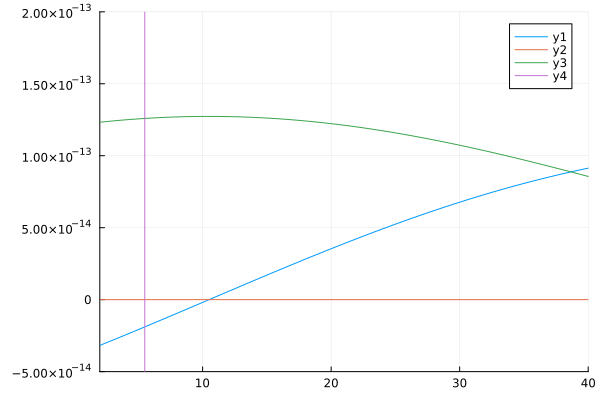

In [20]:
plot(xme, E_xVsmeasure)
plot!(xme, E_yVsmeasure)
plot!(xme, E_zVsmeasure, xlim=(2,40),ylim=(-0.5e-13,2e-13))
vline!([5.5])

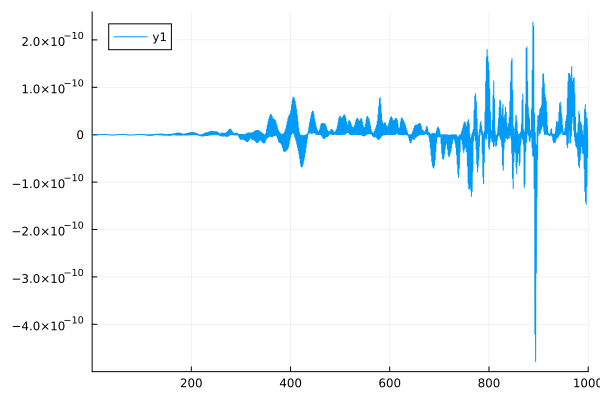

In [31]:
#plot(tss,E_x1Vst,xlim=(200,2000))# ,xlim=(0.1,2000),
plot(tss,E_xVst,xlim=(0.1,1000))

#plot!(tss,E_yVst)
#plot!(tss,E_zVst)

In [506]:
# E_dtJ_func(t,r)= E_dtJ(;r=r,t=t)*ke/(c^2*h) ### The division by h is because the current is un units of (gamma e /h)
# E_n_func(t,r) = E_n(;r=r,t=t)*ke/h
# tss= 0.1:0.01:300
# xs = 1:1:200
# E1t_x = [E_dtJ_func(ti,[5,0,10*L_s])[1] for ti in tss]
# E1t_y = [E_dtJ_func(ti,[5,0,10*L_s])[2] for ti in tss]
# E1t_z = [E_dtJ_func(ti,[5,0,10*L_s])[3] for ti in tss]
# #E1x_x = [E_dtJ_func(300,[5,0,x])[1] for x in xs]

# ###E1t_x = [E_dtJ_func(ti,[5,0,10])[1] for ti in tss]
# ##E1t_y = [E_dtJ_func(ti,[5,0,10])[2] for ti in tss]
# ##E1t_z = [E_dtJ_func(ti,[5,0,10])[3] for ti in tss]

# E2t_x = [E_n_func(ti,[5,0,10*L_s])[1] for ti in tss]
# E2t_y = [E_n_func(ti,[5,0,10*L_s])[2] for ti in tss]
# E2t_z = [E_n_func(ti,[5,0,10*L_s])[3] for ti in tss] ;
# E2x_x = [E_n_func(300,[5,0,x])[1] for x in xs] ;
#E_dtJ(;t=50,r=[5,0,300])[1]


### Dependency with the position 

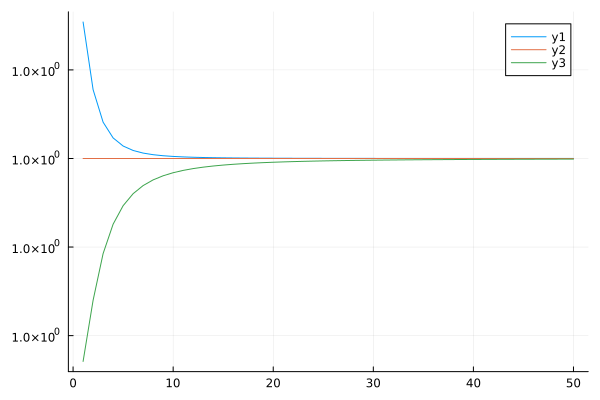

In [223]:
#tss= 0.1:0.1:300
xs = 1:50# :: Int
ti=100
E_xVsx = [E_dtJ(;t=ti,r=[5,0,x])[1] for x in xs]
E_yVsx = [E_dtJ(;t=ti,r=[5,0,x])[2] for x in xs]
E_zVsx = [E_dtJ(;t=ti,r=[5,0,x])[3] for x in xs]
plot(xs, E_xVsx.+ 1 ) #, ylim = (1e-20,1e-10 ),  yaxis=:log) #, ylim = (-1e-14,1e-14 )
#plot!(xs,exp.(-xs).+1)
plot!(xs,E_yVsx.+ 1)
plot!(xs,E_zVsx.+ 1)


In [33]:
name1

"res_U0_w12"

In [45]:
#name1 ="Ni_soc_ndis_she" #### done
#name1 ="NiPt_soc_ndis_she" #### done

Edtj_f = open("./data/Edtj_$(name1)_mag_jl.txt", "w+") 
#Ecden_f = open("./data/Ecden_$(name1)_jl.txt", "w+") 
writedlm(Edtj_f, transpose(hcat(tss, E_xVst)), ' ' )
#writedlm(Ecden_f, transpose(hcat(tss, E2t_x)), ' ' )
#close(Ecden_f)
close(Edtj_f)



# JtVst_f = open("./data/Jdtj_$(name1)_mag_jl.txt", "w+") 
# #Ecden_f = open("./data/Ecden_$(name1)_jl.txt", "w+") 
# writedlm(JtVst _f, transpose(hcat(tss, J_xVst)), ' ' )
# #writedlm(Ecden_f, transpose(hcat(tss, E2t_x)), ' ' )
# #close(Ecden_f)
# close(JtVst _f)

#JtVst 

In [46]:

JtVst_f = open("./data/Jdtj_mag_$(name1)_jl.txt", "w+") 
#Ecden_f = open("./data/Ecden_$(name1)_jl.txt", "w+") 
writedlm(JtVst_f, transpose(hcat(tss, JtVst)), ' ' )
#writedlm(JtVst _f, JtVst, ' ' )
#writedlm(Ecden_f, transpose(hcat(tss, E2t_x)), ' ' )
#close(Ecden_f)
close(JtVst_f)



In [44]:
JtVst

9990-element Vector{Float64}:
 -9.123514122728291e-5
 -8.827499193111636e-5
 -8.527204462948704e-5
 -8.222703593746553e-5
 -7.914071855594747e-5
 -7.601386100760483e-5
 -7.284724747528786e-5
 -6.964167750641198e-5
 -6.639796585814895e-5
 -6.311694217418666e-5
 -5.97994508321757e-5
 -5.644635059921289e-5
 -5.305851447485522e-5
  ⋮
 -0.006084333185575042
 -0.0036030255106146753
  0.0005751636376075917
  0.0054858000591169786
  0.010050052442576259
  0.013347634717617608
  0.014797472554523653
  0.014224799927037058
  0.011834923743456108
  0.008141048905680761
  0.0038709722641621265
 -0.00014450290439719962